<a href="https://colab.research.google.com/github/Athul-Rajagopal/lifeline/blob/main/PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow 
from glob import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.compat.v1 import ConfigProto,InteractiveSession

In [ ]:
config= ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.8
config.gpu_options.allow_growth = True
sessions= InteractiveSession(config=config)

In [ ]:
!nvidia-smi

Sun Jun 13 10:22:30 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   60C    P0    30W /  70W |    222MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19,preprocess_input,decode_predictions
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

In [ ]:
vgg19=VGG19(input_shape=[224,224,3],include_top=False,weights='imagenet')

80142336/80134624 [==============================] - 1s 0us/step


In [ ]:
for layers in vgg19.layers:
    layers.trainable=False

In [ ]:
train_path='/content/drive/MyDrive/programme files/DSmajorPROJECT/TRAIN'
test_path='/content/drive/MyDrive/programme files/DSmajorPROJECT/TEST'

In [ ]:
folder=glob(str(train_path)+'/*')
folder

['/content/drive/MyDrive/programme files/DSmajorPROJECT/TRAIN/Scabies',
 '/content/drive/MyDrive/programme files/DSmajorPROJECT/TRAIN/Wart',
 '/content/drive/MyDrive/programme files/DSmajorPROJECT/TRAIN/Psoriasis',
 '/content/drive/MyDrive/programme files/DSmajorPROJECT/TRAIN/Hives',
 '/content/drive/MyDrive/programme files/DSmajorPROJECT/TRAIN/Seborrhic kertosis',
 '/content/drive/MyDrive/programme files/DSmajorPROJECT/TRAIN/Nevus',
 '/content/drive/MyDrive/programme files/DSmajorPROJECT/TRAIN/Melanoma',
 '/content/drive/MyDrive/programme files/DSmajorPROJECT/TRAIN/Acne',
 '/content/drive/MyDrive/programme files/DSmajorPROJECT/TRAIN/Contact dermatitis',
 '/content/drive/MyDrive/programme files/DSmajorPROJECT/TRAIN/Ringworm']

In [ ]:

x=Flatten()(vgg19.output)
x1=Dense(231,activation='relu')(x)
outlayer=Dense(11,activation='softmax')(x1)

model=Model(inputs=vgg19.input,outputs=outlayer)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
model.compile(optimizer=Adam(),loss=SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [ ]:

train_datagen= ImageDataGenerator(rescale=1/255)

test_datagen=ImageDataGenerator(rescale=1/255)

In [ ]:
'''preprocessing training data using Image_data_Generator,
pass the full data in the given directory to imagedatagenerator and applying parameters.


'''


training_data=train_datagen.flow_from_directory('/content/drive/MyDrive/programme files/DSmajorPROJECT/TRAIN',target_size=(224,224),
                                                class_mode='sparse',batch_size=16)



Found 10279 images belonging to 10 classes.


In [ ]:
testing_data=test_datagen.flow_from_directory('/content/drive/MyDrive/programme files/DSmajorPROJECT/TEST',target_size=(224,224),
                                              batch_size=16,
                                              class_mode='sparse')

Found 1939 images belonging to 10 classes.


In [ ]:
training_data.class_indices, testing_data.class_indices

({'Acne': 0,
  'Contact dermatitis': 1,
  'Hives': 2,
  'Melanoma': 3,
  'Nevus': 4,
  'Psoriasis': 5,
  'Ringworm': 6,
  'Scabies': 7,
  'Seborrhic kertosis': 8,
  'Wart': 9},
 {'Acne': 0,
  'Contact dermatitis': 1,
  'Hives': 2,
  'Melanoma': 3,
  'Nevus': 4,
  'Psoriasis': 5,
  'Ring worm': 6,
  'Scabies': 7,
  'Seborrhic kertosis': 8,
  'Wart': 9})

In [ ]:
training_data.classes.shape

(10279,)

In [ ]:
res= model.fit(training_data,steps_per_epoch=len(training_data),epochs=10,verbose=1,validation_data=testing_data,validation_steps=len(testing_data))

Epoch 1/10
643/643 [==============================] - 3473s 5s/step - loss: 1.8046 - accuracy: 0.4082 - val_loss: 1.5359 - val_accuracy: 0.5106
Epoch 2/10
643/643 [==============================] - 76s 119ms/step - loss: 1.1721 - accuracy: 0.6037 - val_loss: 1.1879 - val_accuracy: 0.6225
Epoch 3/10
643/643 [==============================] - 77s 120ms/step - loss: 0.8695 - accuracy: 0.7213 - val_loss: 1.0363 - val_accuracy: 0.6478
Epoch 4/10
643/643 [==============================] - 78s 121ms/step - loss: 0.6728 - accuracy: 0.7847 - val_loss: 0.8992 - val_accuracy: 0.7241
Epoch 5/10
643/643 [==============================] - 79s 123ms/step - loss: 0.5523 - accuracy: 0.8239 - val_loss: 0.8200 - val_accuracy: 0.7442
Epoch 6/10
643/643 [==============================] - 78s 121ms/step - loss: 0.4428 - accuracy: 0.8586 - val_loss: 0.9989 - val_accuracy: 0.7117
Epoch 7/10
643/643 [==============================] - 78s 121ms/step - loss: 0.4019 - accuracy: 0.8734 - val_loss: 0.7317 - val_acc

In [ ]:
import matplotlib.pyplot as plt


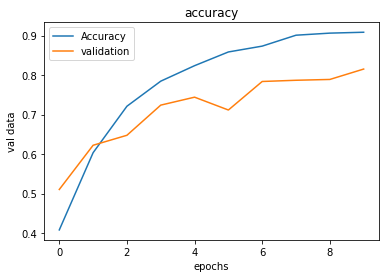

In [ ]:
plt.plot(res.history['accuracy'],label='Accuracy')
plt.plot(res.history['val_accuracy'],label='validation')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('val data')
plt.title('accuracy')
plt.show()


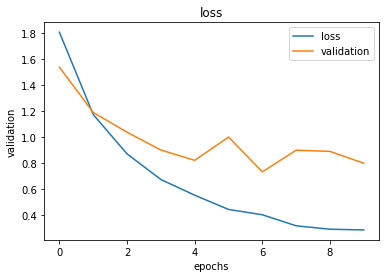

In [ ]:
plt.plot(res.history['loss'],label='loss')
plt.plot(res.history['val_loss'],label='validation')
plt.title('loss')
plt.xlabel('epochs')
plt.ylabel('validation')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img,img_to_array

In [ ]:
img=load_img("/content/download (2).jpg",target_size=(224,224))

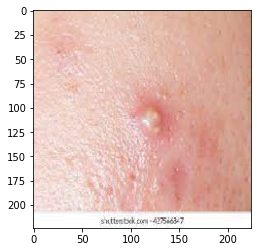

In [ ]:
plt.imshow(img)

In [ ]:
img=img_to_array(img).reshape(1,224,224,3)

In [ ]:
img.shape

(1, 224, 224, 3)

In [ ]:
labels={'Acne': 0,
  'Contact dermatitis': 1,
  'Hives': 2,
  'Melanoma': 3,
  'Nevus': 4,
  'Psoriasis': 5,
  'Ringworm': 6,
  'Scabies': 7,
  'Seborrhic kertosis': 8,
  'Wart': 9}


In [ ]:
result=model.predict(img)

In [ ]:
for i in labels:
    if np.argmax(result)==labels[i]:
        print('dicteted Disorder is =>',i)


dicteted Disorder is => Acne


In [ ]:
model.save("/content/drive/MyDrive/programme files/DSmajorPROJECT/projectbasicmodel.h5")

In [ ]:
img=load_img("/content/download (4).jpg",target_size=(224,224))
img=img_to_array(img).reshape(1,224,224,3)
result=model.predict(img)
for i in labels:
    if np.argmax(result)==labels[i]:
        print('dicteted Disorder is =>',i)



dicteted Disorder is => Acne
